In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
file_path = '/Users/shevlinjaffe/Documents/DS3010/Project/USVideos(Cleaned).csv'
data = pd.read_csv(file_path)

/var/folders/2z/30n1y5hx61v5gt76c8q7ccdh0000gn/T/ipykernel_25344/116178262.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [5]:
print(data.head())

      video_id                                              title  Count_of_!  \
0  2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE         0.0   
1  1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...         0.0   
2  5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...         0.0   
3  puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?         0.0   
4  d380meD0W0M                           I Dare You: GOING BALD!?         1.0   

   Count_of_?  Count_Capital_Letters          channel_title  category_id  \
0         0.0                   28.0           CaseyNeistat         22.0   
1         0.0                   11.0        LastWeekTonight         24.0   
2         0.0                    8.0           Rudy Mancuso         23.0   
3         1.0                    4.0  Good Mythical Morning         24.0   
4         1.0                   12.0               nigahiga         24.0   

         Category                                       

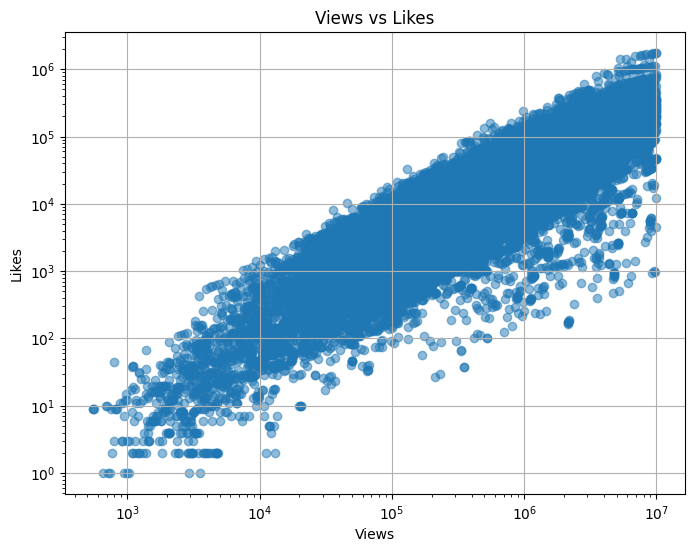

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data['views'], data['likes'], alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views vs Likes')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
data['viral'] = (data['views'] > 2_500_000).astype(int)

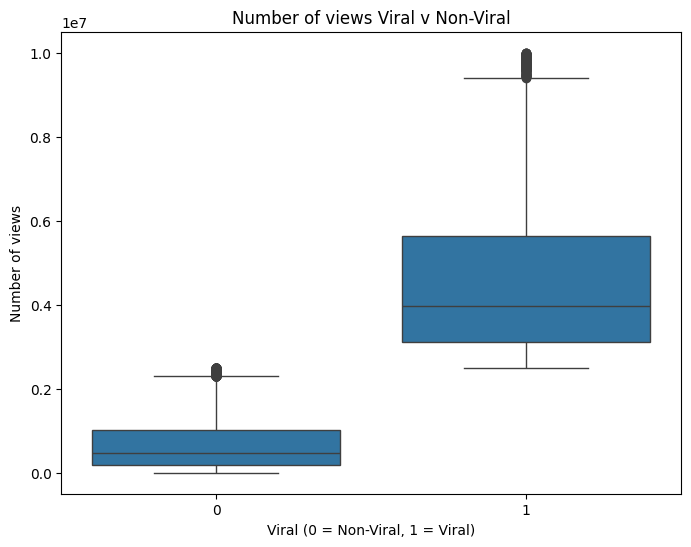

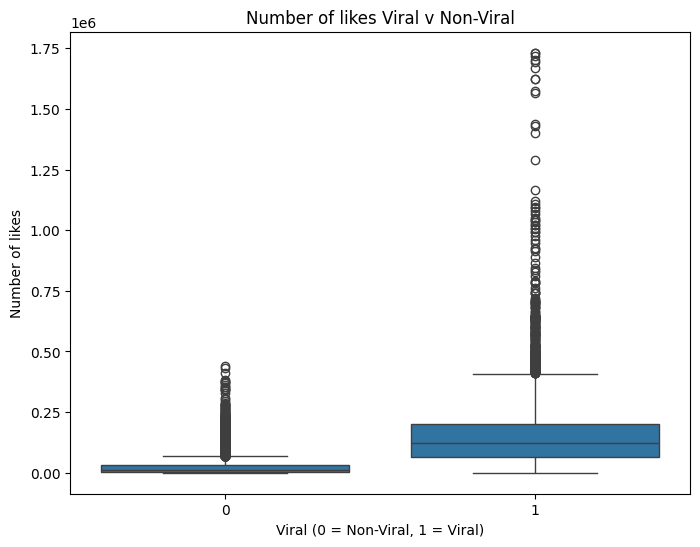

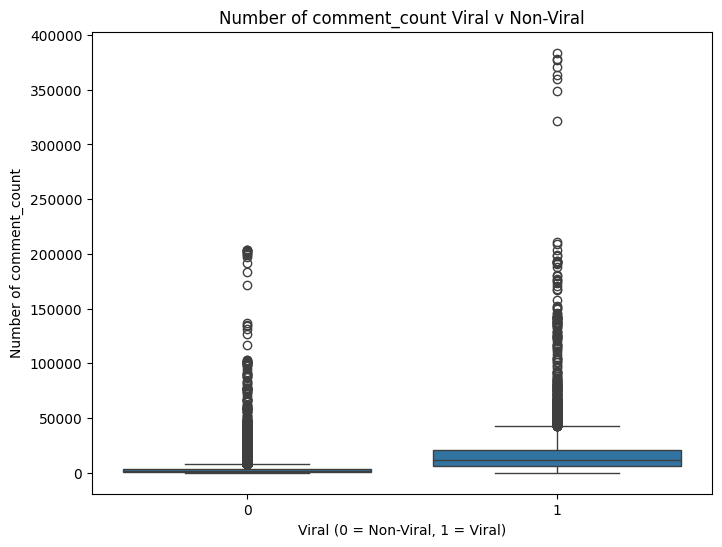

In [8]:
for col in ['views', 'likes', 'comment_count']:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='viral', y=col, data=data)
    plt.title(f'Number of {col} Viral v Non-Viral')
    plt.xlabel('Viral (0 = Non-Viral, 1 = Viral)')
    plt.ylabel(f'Number of {col}')
    plt.show()

In [9]:
print(data.columns)

Index(['video_id', 'title', 'Count_of_!', 'Count_of_?',
       'Count_Capital_Letters', 'channel_title', 'category_id', 'Category',
       'tags', 'Num_tags', 'views', 'likes', 'dislikes', 'comment_count',
       'like_dislike_ratio', 'view_comment_ratio', 'Viral?', 'viral'],
      dtype='object')


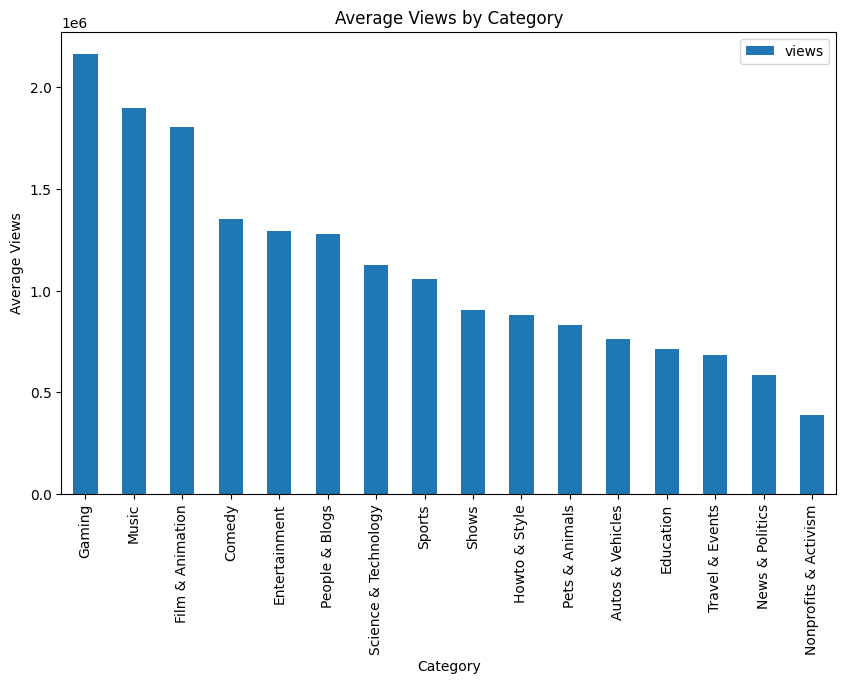

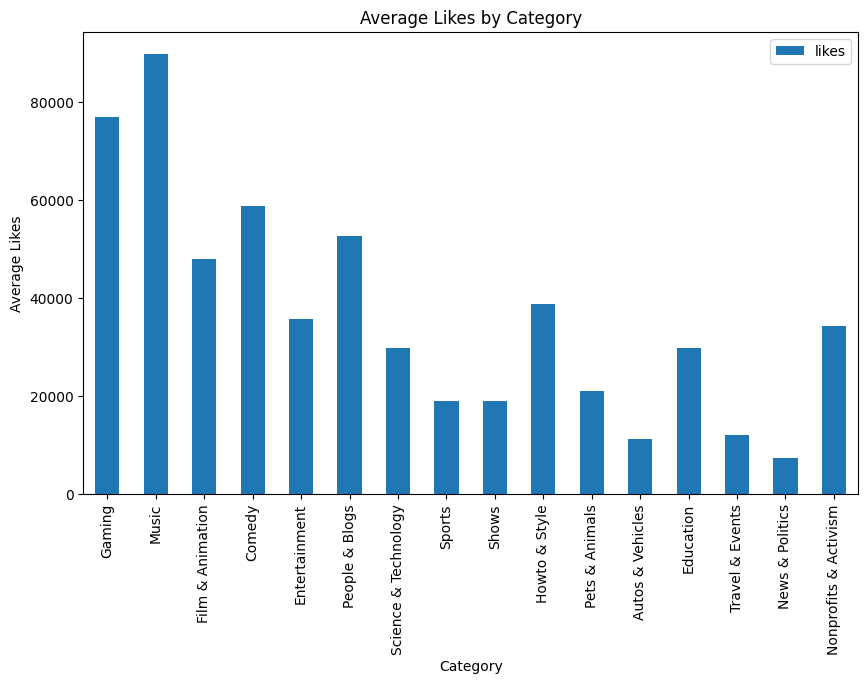

In [ ]:
avg_metrics = data.groupby('Category')[['views', 'likes']].mean().sort_values('views', ascending=False)

avg_metrics[['views']].plot(kind='bar', figsize=(10,6))
plt.title('Average Views by Category')
plt.ylabel('Average Views')
plt.xticks(rotation=90)
plt.show()

avg_metrics[['likes']].plot(kind='bar', figsize=(10,6))
plt.title('Average Likes by Category')
plt.ylabel('Average Likes')
plt.xticks(rotation=90)
plt.show()


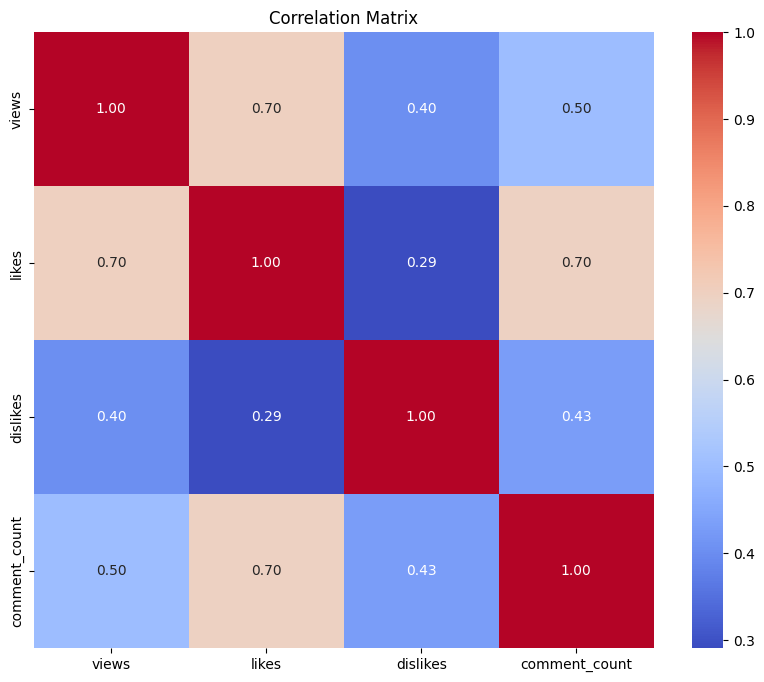

In [ ]:
plt.figure(figsize=(10,8))
corr = data[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\?'
<>:3: SyntaxWarning: invalid escape sequence '\?'
/var/folders/2z/30n1y5hx61v5gt76c8q7ccdh0000gn/T/ipykernel_25344/4060290447.py:3: SyntaxWarning: invalid escape sequence '\?'
  data['question_count'] = data['title'].str.count('\?')


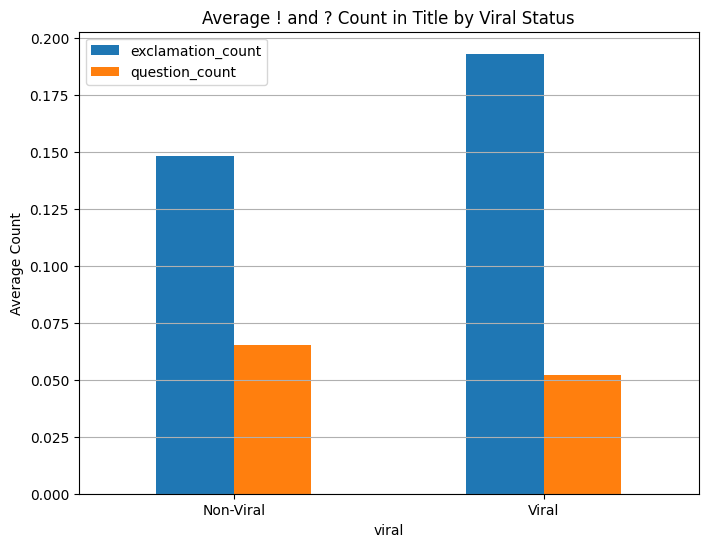

In [ ]:
data['exclamation_count'] = data['title'].str.count('!')
data['question_count'] = data['title'].str.count('\?')

special_char_avg = data.groupby('viral')[['exclamation_count', 'question_count']].mean()
special_char_avg.plot(kind='bar', figsize=(8,6))
plt.title('Average ! and ? Count in Title by Viral Status')
plt.ylabel('Average Count')
plt.xticks([0,1], ['Non-Viral','Viral'], rotation=0)
plt.grid(axis='y')
plt.show()

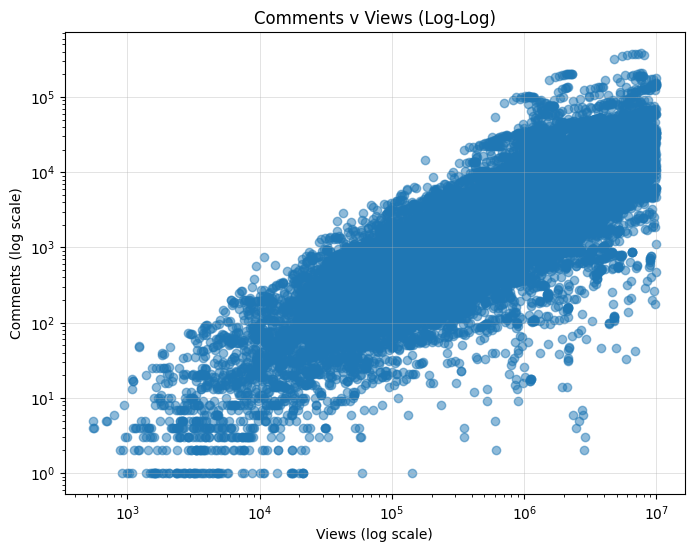

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(data['views'], data['comment_count'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Views (log scale)')
plt.ylabel('Comments (log scale)')
plt.title('Comments v Views (Log-Log)')
plt.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.5)

plt.show()

In [14]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [15]:
from wordcloud import WordCloud

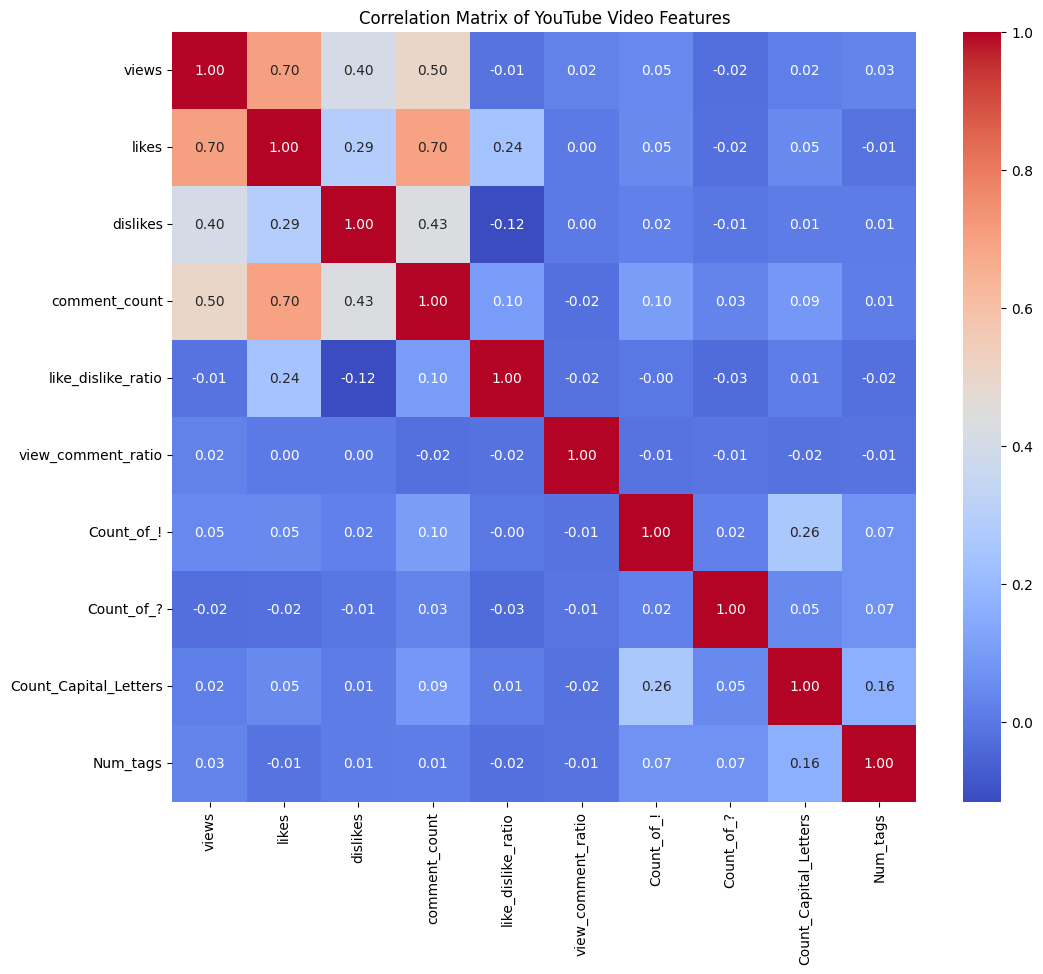

In [ ]:
data = data.replace('#DIV/0!', np.nan)

plt.figure(figsize=(12,10))
selected_features = ['views', 'likes', 'dislikes', 'comment_count',
                     'like_dislike_ratio', 'view_comment_ratio',
                     'Count_of_!', 'Count_of_?', 'Count_Capital_Letters', 'Num_tags']

corr_matrix = data[selected_features].astype(float).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of YouTube Video Features')
plt.show()

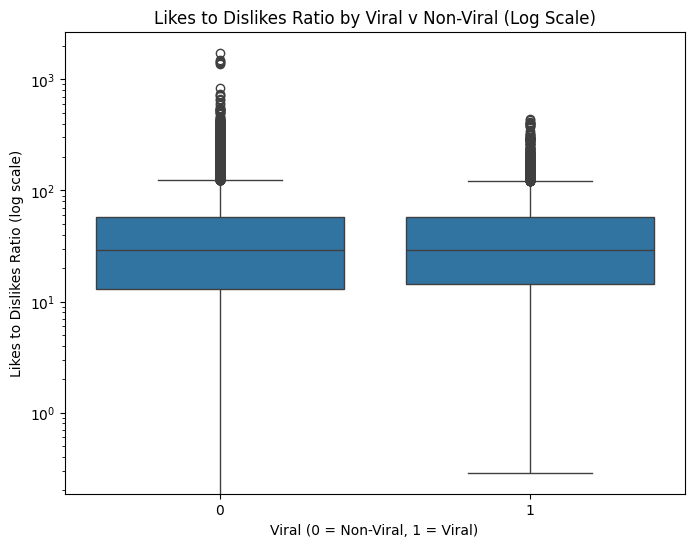

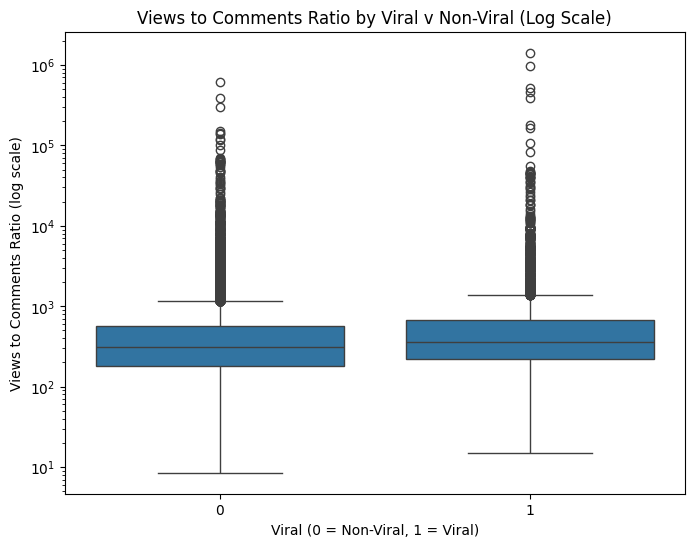

In [ ]:
data['like_dislike_ratio'] = pd.to_numeric(data['like_dislike_ratio'], errors='coerce')
data['view_comment_ratio'] = pd.to_numeric(data['view_comment_ratio'], errors='coerce')

plt.figure(figsize=(8,6))
sns.boxplot(x='viral', y='like_dislike_ratio', data=data)
plt.yscale('log')  
plt.title('Likes to Dislikes Ratio by Viral v Non-Viral (Log Scale)')
plt.xlabel('Viral (0 = Non-Viral, 1 = Viral)')
plt.ylabel('Likes to Dislikes Ratio (log scale)')
plt.grid(False) 
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='viral', y='view_comment_ratio', data=data)
plt.yscale('log') 
plt.title('Views to Comments Ratio by Viral v Non-Viral (Log Scale)')
plt.xlabel('Viral (0 = Non-Viral, 1 = Viral)')
plt.ylabel('Views to Comments Ratio (log scale)')
plt.grid(False)   
plt.show()